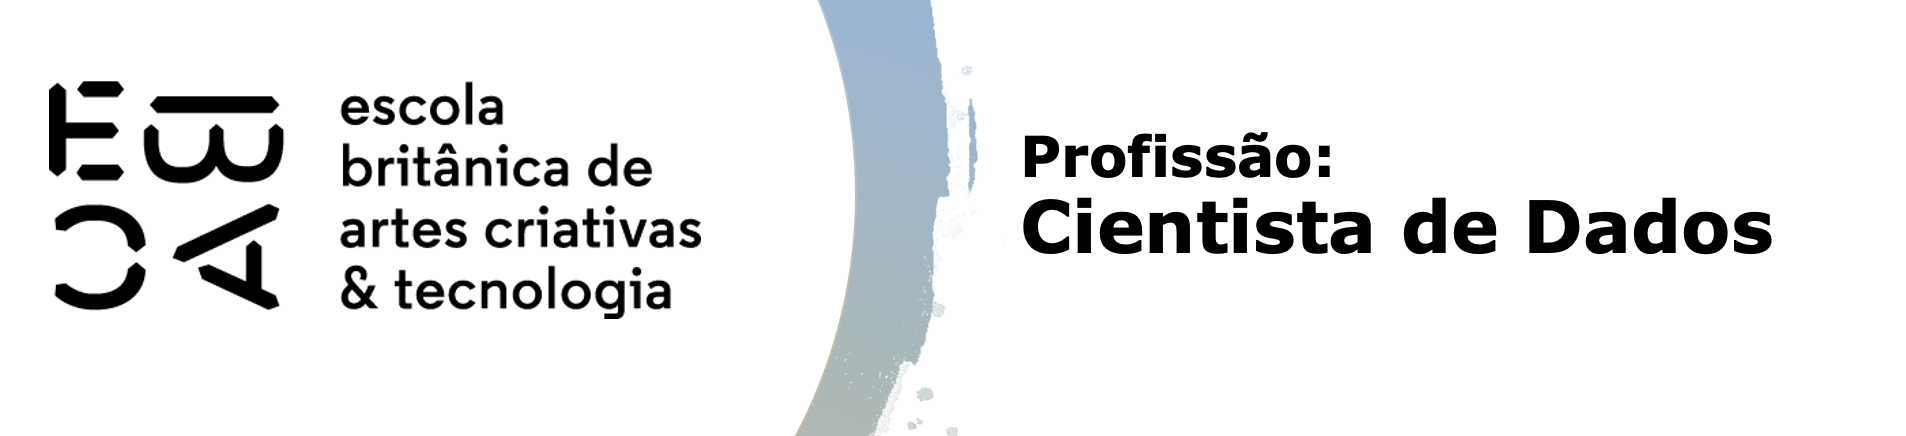

# Tarefa: K-means

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?"

Nosso objetivo é tentar agrupar os clientes conforme seu comportamento de navegação entre páginas administrativas, informativas e de produtos.

As variáveis estão descritas abaixo (em tradução livre do link indicado).

Por este motivo, o escopo desta análise estará fechado nas primeiras seis variáveis da tabela, referentes a quantidade e tempo de acesso por tipo de página, atributos que falam mais do comportamento de navegação do cliente que de características da página o da época do ano.

|Variavel                |Descrição          |
|------------------------|:-------------------|
|Administrative          | Quantidade de acessos em páginas administrativas|
|Administrative_Duration | Tempo de acesso em páginas administrativas |
|Informational           | Quantidade de acessos em páginas informativas  |
|Informational_Duration  | Tempo de acesso em páginas informativas  |
|ProductRelated          | Quantidade de acessos em páginas de produtos |
|ProductRelated_Duration | Tempo de acesso em páginas de produtos |
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  |
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações |
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico |
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) |
|Month                   | Mês  |
|OperatingSystems        | Sistema operacional do visitante |
|Browser                 | Browser do visitante |
|Region                  | Região |
|TrafficType             | Tipo de tráfego                  |
|VisitorType             | Tipo de visitante: novo ou recorrente |
|Weekend                 | Indica final de semana |
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [13]:
# Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [14]:
# Carregando a base de dados
df = pd.read_csv('online_shoppers_intention.csv')

In [15]:
# Mostrando as 5 primeiras linhas do dataframe
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [16]:
# Distribuição de valores na coluna ‘Revenue’, incluindo a presença de quaisquer dados ausentes.
df.Revenue.value_counts(dropna=False)

False    10422
True      1908
Name: Revenue, dtype: int64

## 1. Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

In [17]:
# Selecionando as colunas de interesse
cols = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration']
df = df[cols]

In [18]:
# Análise descritiva
print(df.describe())

       Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  
count            12330.000000    12330.000000             12330.000000  
mean                34.472398       31.731468              1194.746220  
std                140.749294       44.475503              1913.669288  
min                  0.000000        0.000000                 0.000000  
25%                  0.000000        7.000000    

In [19]:
# Verificando se há valores faltantes
print(df.isnull().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
dtype: int64


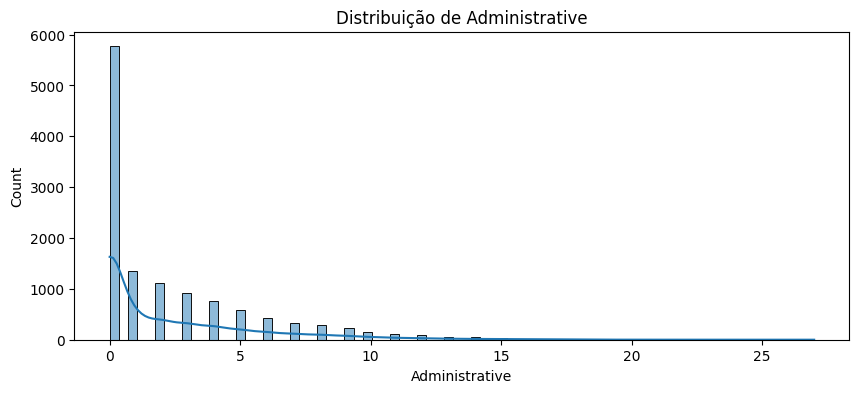

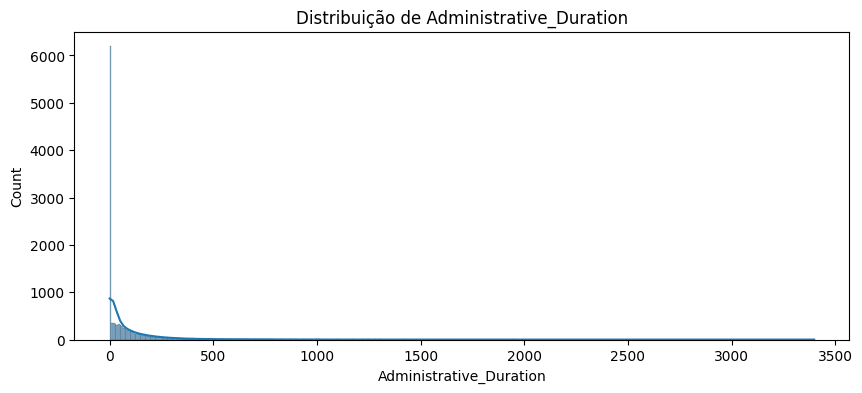

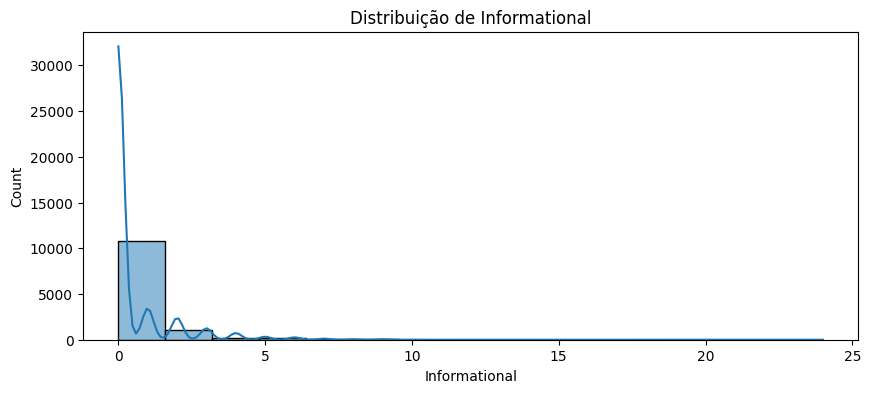

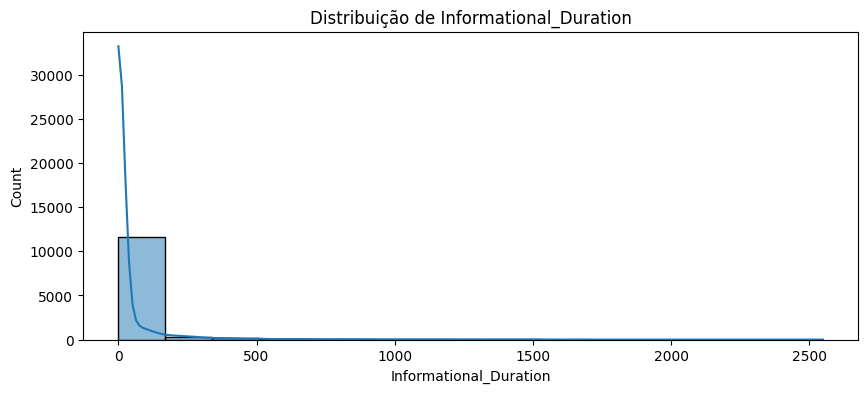

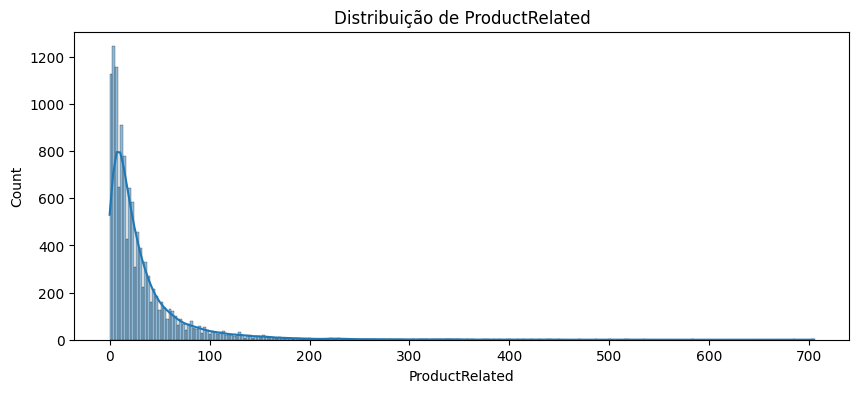

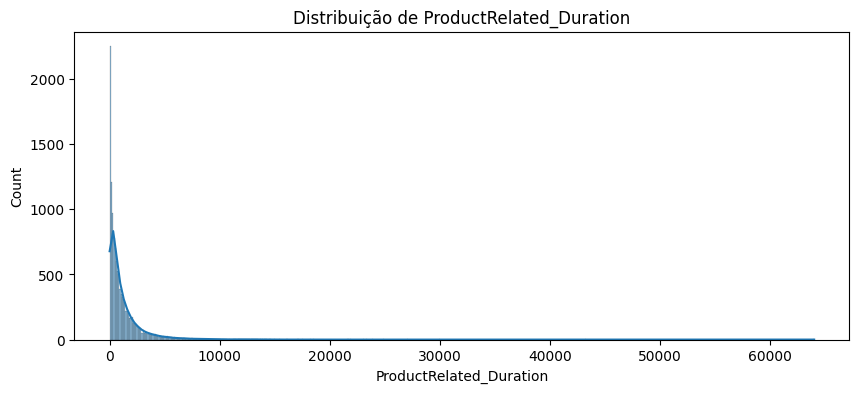

In [20]:
# Distribuição das variáveis
for col in cols:
    plt.figure(figsize=(10,4))
    sns.histplot(data=df, x=col, kde=True)
    plt.title('Distribuição de ' + col)
    plt.show()

## 2. Número de grupos

Utilize as técnicas vistas em aula que te ajudem a decidir pelo número de grupos a ser utilizados.

### 2.1 Método do Cotovelo

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

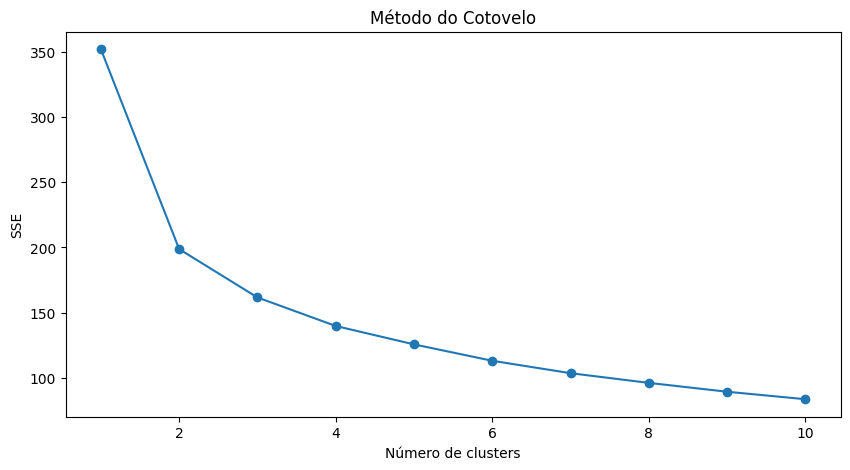

In [24]:
# Normalizando os dados
df_norm = (df - df.min()) / (df.max() - df.min())

# Método do Cotovelo
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_norm)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('SSE')
plt.title('Método do Cotovelo')
plt.show()

No Método do Cotovelo, o número ideal de clusters é onde a soma dos erros quadráticos (SSE) começa a se estabilizar (forma um “cotovelo”).
>No gráfico que você gerado, parece que o “cotovelo” está entre 2 e 4 clusters, onde a taxa de diminuição do SSE começa a se estabilizar. Isso sugere que o número ideal de clusters para seus dados pode ser em torno de 2 a 4.

### 2.2 Método da Silhueta

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

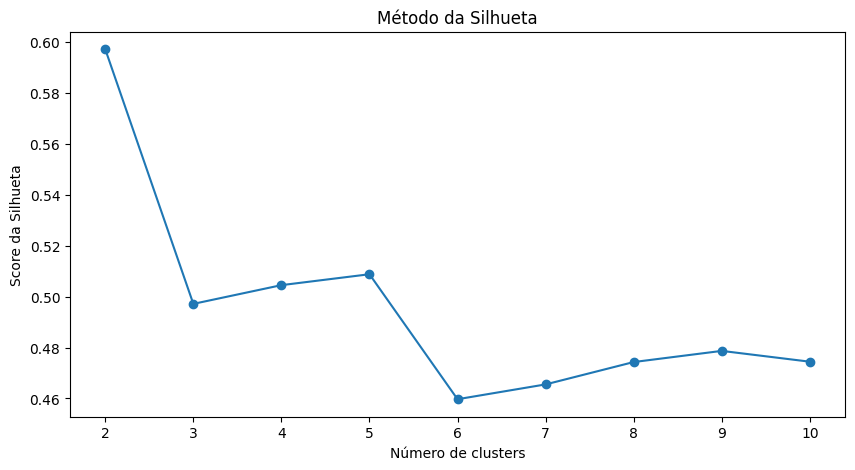

In [25]:
# Método da Silhueta
sil = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_norm)
    score = silhouette_score(df_norm, kmeans.labels_)
    sil.append(score)

plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), sil, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Score da Silhueta')
plt.title('Método da Silhueta')
plt.show()

No Método da Silhueta, o número ideal de clusters é onde o score da silhueta é máximo.
Este método calcula a média da distância entre cada ponto de dados em um cluster e todos os outros pontos nesse cluster (coesão), bem como a média da distância entre cada ponto de dados em um cluster e todos os pontos no cluster mais próximo (separação). O score da silhueta é a diferença entre a coesão e a separação, dividida pelo maior dos dois. Portanto, um score da silhueta alto indica que os pontos de dados estão bem agrupados.

>No gráfico gerado, o score da silhueta é máximo para 2 clusters, o que sugere que 2 pode ser o número ideal de clusters para seus dados.

No entanto, o score da silhueta diminui à medida que o número de clusters aumenta, o que indica que a qualidade do agrupamento diminui com mais clusters.


## 3. Avaliação dos grupos

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final.
- Se puder, sugira nomes para os grupos.

In [28]:
# Normalizando os dados
df_norm = (df - df.min()) / (df.max() - df.min())

# Número de clusters
n_clusters = [2, 3]

for n in n_clusters:
    # Criando o modelo KMeans
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(df_norm)

    # Adicionando os labels dos clusters ao dataframe
    df['Cluster'] = kmeans.labels_

    # Análise descritiva dos clusters
    print(f'Análise descritiva para {n} clusters:')
    print(df.groupby('Cluster').describe().transpose())


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Análise descritiva para 2 clusters:
Cluster                                   0             1
Administrative          count   9057.000000   3273.000000
                        mean       1.516507      4.525206
                        std        3.408376      1.665317
                        min        0.000000      0.000000
                        25%        0.000000      3.000000
                        50%        0.000000      4.000000
                        75%        1.000000      6.000000
                        max       27.000000      9.000000
Administrative_Duration count   9057.000000   3273.000000
                        mean      53.643124    156.018238
                        std      166.620474    182.248763
                        min        0.000000      0.000000
                        25%        0.000000     60.200000
                        50%        0.000000    103.000000
                        75%       27.000000    179.750000
                        max     3398

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Análise descritiva para 3 clusters:
Cluster                                   0             1             2
Administrative          count   3273.000000   8058.000000    999.000000
                        mean       4.525206      0.404567     10.485485
                        std        1.665317      0.692977      3.321386
                        min        0.000000      0.000000      1.000000
                        25%        3.000000      0.000000      8.000000
                        50%        4.000000      0.000000     10.000000
                        75%        6.000000      1.000000     12.000000
                        max        9.000000      2.000000     27.000000
Administrative_Duration count   3273.000000   8058.000000    999.000000
                        mean     156.018238     14.629050    368.333223
                        std      182.248763     41.982154    355.348158
                        min        0.000000      0.000000      3.000000
                        25% 

A análise descritiva para 2 clusters mostra algumas diferenças interessantes entre os clusters:

- O Cluster 0 tem uma média menor de acessos em páginas administrativas, informativas e de produtos em comparação com o Cluster 1. Isso sugere que os usuários no Cluster 0 tendem a navegar menos pelas páginas do que os usuários no Cluster 1.

- O tempo médio de acesso (duração) nas páginas administrativas, informativas e de produtos também é menor para o Cluster 0 em comparação com o Cluster 1. Isso indica que os usuários no Cluster 0 tendem a passar menos tempo nas páginas do que os usuários no Cluster 1.

- A contagem de usuários no Cluster 0 é significativamente maior do que no Cluster 1. Isso sugere que a maioria dos usuários se enquadra no Cluster 0.

A análise descritiva para 3 clusters mostra algumas diferenças interessantes entre os clusters:

- O Cluster 0 tem uma média menor de acessos em páginas administrativas, informativas e de produtos em comparação com o Cluster 1 e o Cluster 2. Isso sugere que os usuários no Cluster 0 tendem a navegar menos pelas páginas do que os usuários nos outros clusters.

- O Cluster 1 tem uma média de acessos em páginas administrativas, informativas e de produtos maior do que o Cluster 0, mas menor do que o Cluster 2. Isso sugere que os usuários no Cluster 1 tendem a navegar mais pelas páginas do que os usuários no Cluster 0, mas menos do que os usuários no Cluster 2.

- O Cluster 2 tem a maior média de acessos em páginas administrativas, informativas e de produtos. Isso sugere que os usuários no Cluster 2 são os que mais navegam pelas páginas.

- O tempo médio de acesso (duração) nas páginas administrativas, informativas e de produtos também é menor para o Cluster 0 em comparação com os outros clusters, e é o maior para o Cluster 2.

- A contagem de usuários no Cluster 0 e no Cluster 1 é significativamente maior do que no Cluster 2. Isso sugere que a maioria dos usuários se enquadra no Cluster 0 e no Cluster 1.

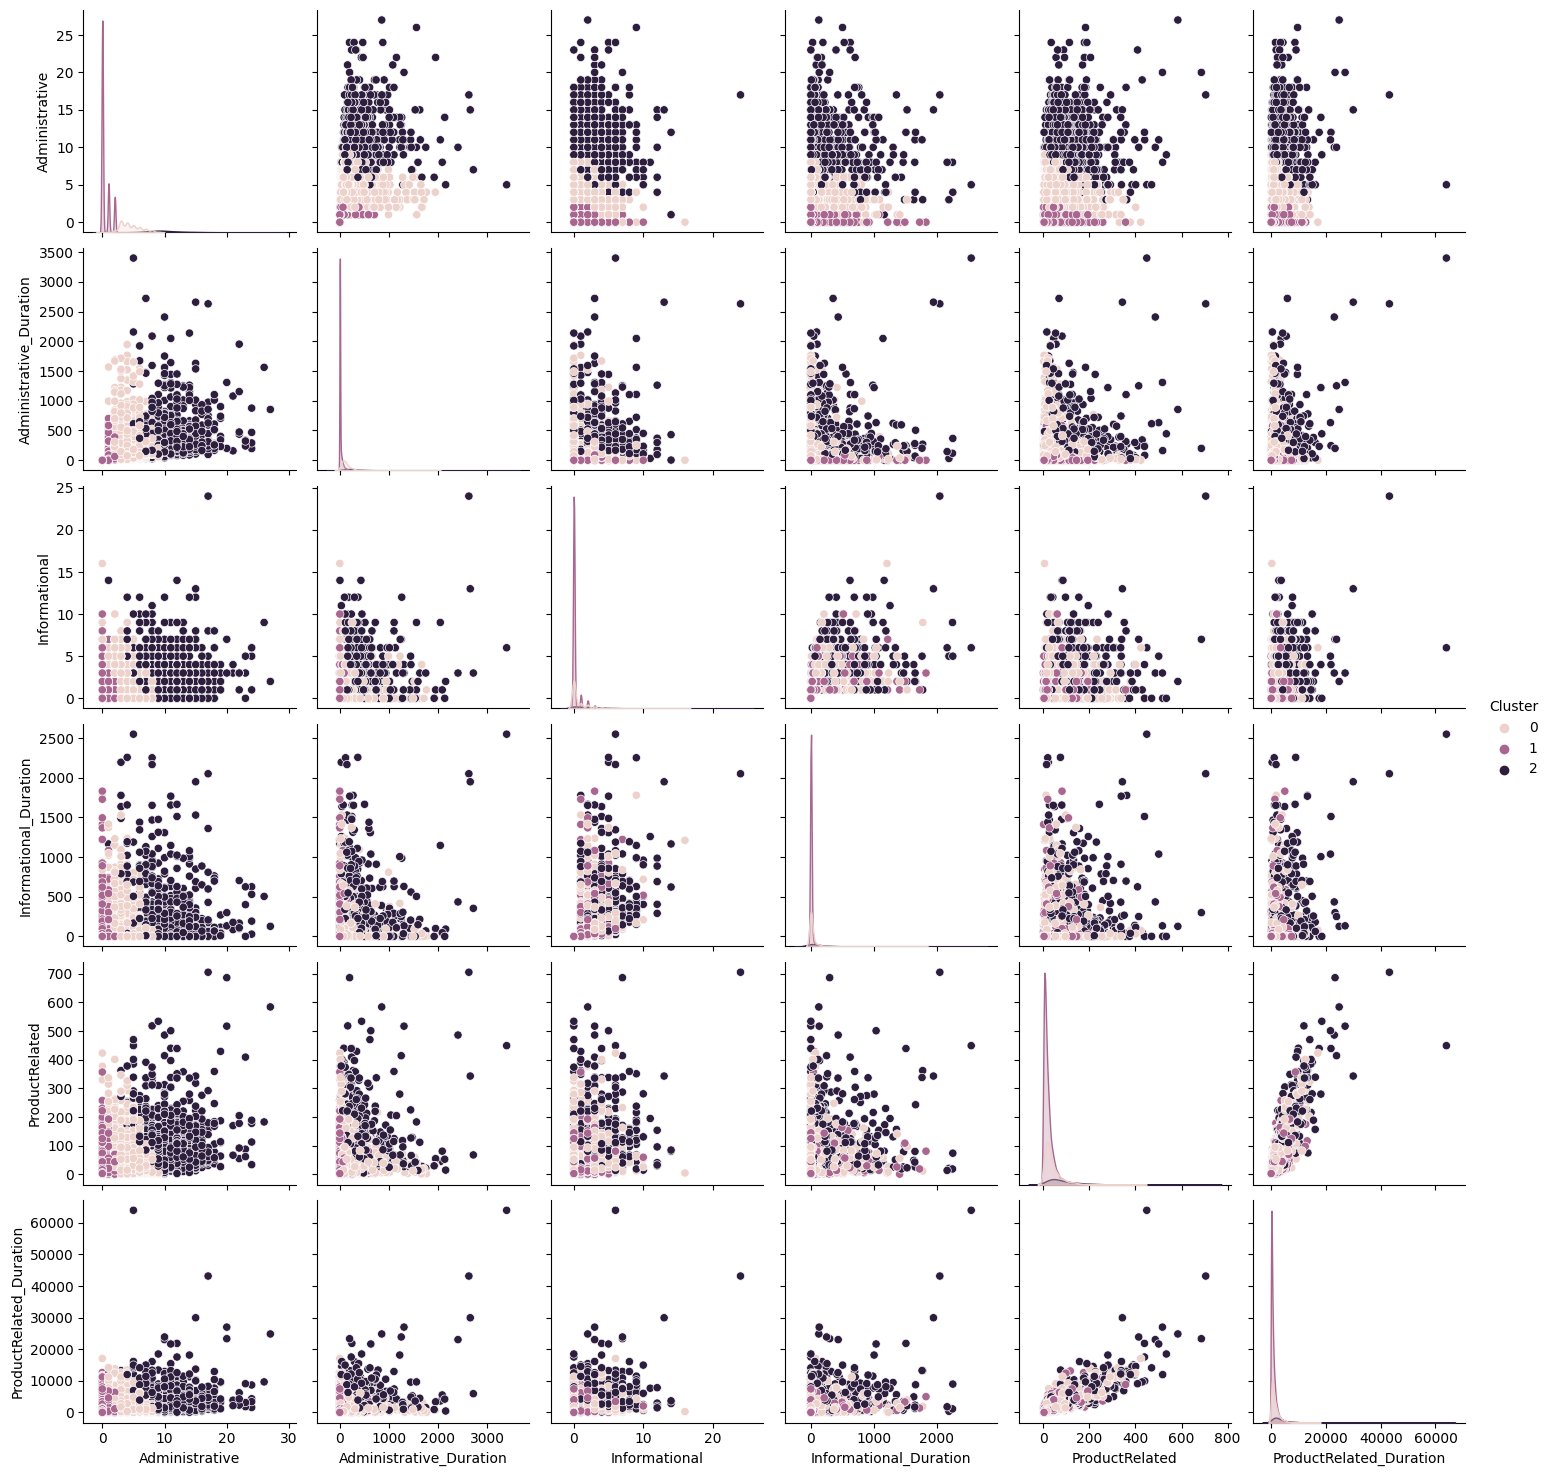

In [29]:
# Criando o pairplot
sns.pairplot(df, hue='Cluster')
plt.show()

## 4. Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*).
- Qual grupo possui clientes mais propensos à compra?

In [30]:
# Carregar as variáveis adicionais
df['BounceRates'] = pd.read_csv('online_shoppers_intention.csv')['BounceRates']
df['Revenue'] = pd.read_csv('online_shoppers_intention.csv')['Revenue']

# Calcular a média de 'BounceRates' e 'Revenue' para cada cluster
print(df.groupby('Cluster')['BounceRates', 'Revenue'].mean())


         BounceRates   Revenue
Cluster                       
0           0.006622  0.205316
1           0.030512  0.119384
2           0.006088  0.274274


<ipython-input-30-66e465843f84>:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(df.groupby('Cluster')['BounceRates', 'Revenue'].mean())


>Com base nos resultados, **o grupo de clientes mais propenso à compra é o Cluster 2**, pois possui a maior média de 'Revenue' (0.274274).
Isso sugere que os usuários no Cluster 2 têm maior probabilidade de fazer uma compra em comparação com os usuários nos outros clusters.